# 簡単な調査用

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

train_ = pickle.load(open('./processed/lgb_train.pkl', 'rb'))
test_ = pickle.load(open('./processed/lgb_test.pkl', 'rb'))

train = pd.read_csv('./raws/train_data.csv')
test = pd.read_csv('./raws/test_data.csv')

In [9]:
train.sort_values('year')

,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
263,263,24.349435,124.199812,20.0,1999.11.6,1999.0,11.0,0.3150,NaN,0.0,...,0.359088,0.318843,-0.075803,-0.820479,-4.931990,-2.035499,304.806473,1.921078,0.107706,3624_20
4548,4548,24.352326,124.202653,20.0,1999.11.8,1999.0,11.0,0.0050,NaN,0.0,...,0.409346,0.321903,-0.071723,-0.535105,-3.331740,4.297234,1391.755734,1.669992,0.194766,3624_20
10133,10133,24.348414,124.203457,20.0,1999.11.7,1999.0,11.0,0.3500,NaN,0.0,...,0.513537,0.278490,-0.147805,-0.820271,-3.313264,4.205754,129.516138,2.535835,0.781047,3624_20
6871,6871,24.352543,124.199637,20.0,1999.11.7,1999.0,11.0,0.0175,NaN,0.0,...,0.372630,0.304411,-0.070571,-0.730751,-4.460289,3.618622,501.760319,-4.264388,0.248087,3624_20
6908,6908,24.351304,124.200783,20.0,1999.11.7,1999.0,11.0,0.0500,NaN,0.0,...,0.469724,0.324832,-0.110250,-0.821876,-4.254536,3.353266,231.634712,1.616283,0.291899,3624_20
6242,6242,24.350891,124.201165,20.0,1999.11.7,1999.0,11.0,0.0300,NaN,0.0,...,0.477018,0.317528,-0.055685,-0.827041,-5.274929,6.552586,218.261711,1.546145,0.363281,3624_20
6158,6158,24.352847,124.202498,20.0,1999.11.8,1999.0,11.0,0.0050,NaN,0.0,...,0.390004,0.327029,-0.053743,-0.537063,-3.650647,3.743912,1501.406374,1.750278,0.203418,3624_20
9973,9973,24.348074,124.201833,1.0,1999.11.7~1999.11.7,1999.0,11.0,0.3250,1.15,0.0,...,0.516186,0.274063,-0.092440,-0.836589,-3.255591,5.240576,149.291575,2.410812,0.679272,3624_20
7056,7056,24.350341,124.201675,20.0,1999.11.7,1999.0,11.0,0.0300,NaN,0.0,...,0.483905,0.307703,-0.097955,-0.808848,-5.232806,3.877469,241.858879,1.577533,0.428734,3624_20
6120,6120,24.348916,124.201503,20.0,1999.11.6,1999.0,11.0,0.2000,NaN,0.0,...,0.401778,0.313591,-0.061508,-0.838624,-4.475597,3.844169,198.136226,1.698910,0.238088,3624_20


# やること
- trainとtestの文献が同じか調査
-- 精度を上げている各特徴量が「真の」特徴と文献の特徴いずれを表象しているか検討
- 海草の被度に影響を与える要因の調査
- 衛星データの処理方法
-- 複数の衛星で色などに変化がないか調査すれば確実性がわかる

### 調査項目
- 土砂の流入による汚濁
- プランクトンによる汚濁
- 海底の物理的安定性
- 底質

### 重要度からみた項目
- 水深
- 水温（最高水温？）
- 開放度

# 透明度の指標検討

## 土砂
- 河口からの距離
- 底質
- 大雨
## プランクトン
- 栄養塩濃度
- 河口からの距離

In [15]:
train_

,lat,lon,area,cover,depth_original,cliff_length,aicial_length,beach_length,coast_length,coastal_dist,...,river_area,river_dist,Salinity_annual,warm_sst,sst_annual,sst_ymd,sst_diff,beach_rate,aicial_rate,time
0,24.989139,125.243167,20.0,0.050,NaN,0.000000,0.000000,0.000000,0.000000,5590.0,...,2986.000000,126.328598,34.560532,29.149746,25.886436,28.750600,-2.864164,NaN,NaN,153.0
1,26.996172,127.912024,40.0,0.725,NaN,0.000000,0.478772,949.173828,949.652588,50.0,...,1920.000000,36.931263,34.657925,28.947212,24.752906,27.285750,-2.532844,0.999496,0.000504,127.0
2,26.363556,127.735139,20.0,0.025,NaN,0.000000,180.985031,521.317383,702.302429,205.0,...,3694.000000,1.586363,34.709606,29.123978,24.983584,26.944032,-1.960448,0.742298,0.257702,130.0
3,26.991255,127.912302,40.0,0.575,NaN,0.000000,0.361444,799.384399,799.745850,150.0,...,1920.000000,36.497868,34.658588,28.945391,24.756948,21.462371,3.294577,0.999548,0.000452,121.0
4,26.988254,127.917254,40.0,0.225,NaN,0.000000,6.062498,954.537293,960.599793,210.0,...,1920.000000,35.928719,34.658199,28.924425,24.729167,21.429968,3.299199,0.993689,0.006311,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,24.728611,125.403889,20.0,0.050,NaN,1294.458862,0.000000,56.749870,1351.208740,10.0,...,2986.000000,128.361176,34.577484,29.155453,25.925355,28.841067,-2.915711,0.041999,0.000000,153.0
14136,27.002425,127.927444,40.0,0.300,NaN,0.000000,88.078857,798.082642,886.161499,250.0,...,1830.441040,37.313286,34.654415,28.922777,24.724760,28.070419,-3.345659,0.900606,0.099394,127.0
14137,24.797444,125.162417,20.0,0.050,NaN,0.000000,0.000000,594.742188,594.742188,530.0,...,2986.000000,108.605507,34.567966,29.197662,25.955850,22.217586,3.738264,1.000000,0.000000,158.0
14138,26.999893,127.922014,40.0,0.425,NaN,0.000000,53.709103,1355.455078,1409.164185,5.0,...,1886.924438,37.150047,34.655884,28.926985,24.739000,21.467750,3.271250,0.961886,0.038114,124.0


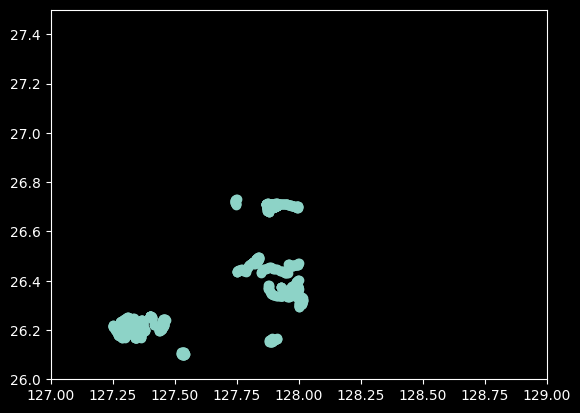

In [47]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

df = test_

# plt.scatter(df['lon'], df['lat'], c=df['cover'], cmap='Blues')
plt.scatter(df['lon'], df['lat'])
plt.xlim(127, 129)
plt.ylim(26, 27.5)
plt.show()

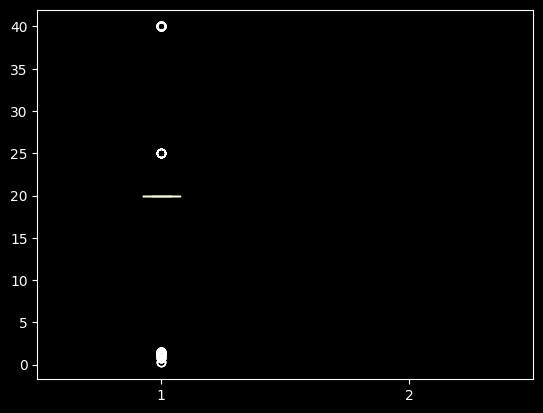

In [25]:
df = train_

plt.boxplot([train_['area'], test_['area']])
plt.show()

In [27]:
train_['area'].describe()

count    14140.000000
mean        22.096128
std          6.772981
min          0.250000
25%         20.000000
50%         20.000000
75%         20.000000
max         40.000000
Name: area, dtype: float64

# 座標の検討

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

df = test_

# plt.scatter(df['lon'], df['lat'], c=df['cover'], cmap='Blues')
plt.scatter(df['lon'], df['lat'])
plt.xlim(127, 129)
plt.ylim(26, 27.5)
plt.show()

In [51]:
test_.loc[:, ['lon', 'lat']].describe()

,lon,lat
count,4039.000000,4039.000000
mean,125.971746,25.376991
std,1.516019,0.934498
min,123.750083,24.044556
25%,124.297514,24.562069
50%,125.398451,24.783725
75%,127.819899,26.337013
max,128.016111,26.732861


# 文献の分類

In [5]:
test.loc[test['type']=='2_12', ['type', 'YMD']]

,type,YMD
2,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
168,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
207,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
219,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
223,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
254,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
404,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
537,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
693,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."
779,2_12,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3..."


In [9]:
train['type'] = [str(str(i).count('-')) +'_'+ str(str(i).count('.')) for i in list(train['YMD'])]
grouped = train.loc[:, ['type', 'cover', 'depth_original']].groupby('type')

In [4]:
test['type'] = [str(str(i).count('-')) +'_'+ str(str(i).count('.')) for i in list(test['YMD'])]
tgrouped = test.loc[:, ['type', 'YMD']].groupby('type')
tgrouped.count()

,YMD
type,
0_0,1916
0_1,271
0_2,86
1_4,81
2_12,41


In [10]:
grouped.describe()

cover                                                           \
        count      mean       std    min      25%    50%    75%    max   
type                                                                     
0_0   11625.0  0.130129  0.216508  0.000  0.02500  0.050  0.075  0.950   
0_1     340.0  0.064044  0.100732  0.000  0.02500  0.050  0.050  0.900   
0_2     390.0  0.282862  0.232864  0.000  0.07125  0.250  0.450  0.950   
0_4       9.0  0.515733  0.185372  0.125  0.50000  0.550  0.650  0.675   
1_2      46.0  0.146739  0.177765  0.000  0.05000  0.100  0.150  0.700   
1_4    1730.0  0.539870  0.289711  0.000  0.30000  0.575  0.800  1.000   

     depth_original                                                          
              count       mean       std   min     25%    50%     75%   max  
type                                                                         
0_0          4059.0   2.003671  2.744151  -1.2   0.200   1.10   2.800  21.2  
0_1            25.0   8.280000  4.869292   0.0   5.000   8.00  12.000  18.0  
0_2           222.0   2.524189  3.385304  -0.6   0.450   1.00   3.975  18.2  
0_4             9.0   1.805556  2.462905   0.0   0.100   1.15   1.600   7.9  
1_2            46.0  24.391304  6.664927  10.0  20.000  25.00  28.750  46.0  
1_4            58.0   0.961379  0.643890   0.4   0.535   0.85   1.050   4.5

In [6]:
np.unique(train['type'])

array(['0_0', '0_1', '0_2', '0_4', '1_2', '1_4'], dtype=object)

In [21]:
res = pd.read_csv('../export/02_07_14:58/result.csv')
res

,Unnamed: 0,pred,lat,lon,area,cover,depth_original,cliff_length,aicial_length,beach_length,...,river_dist,Salinity_annual,warm_sst,sst_annual,sst_ymd,sst_diff,beach_rate,aicial_rate,YMDstyle,error
0,0,0.230640,24.989139,125.243167,20.0,0.050,NaN,0.000000,0.000000,0.000000,...,126.328598,34.560532,29.149746,25.886436,28.750600,-2.864164,NaN,NaN,0_0,0.032631
1,2,0.434405,26.363556,127.735139,20.0,0.025,NaN,0.000000,180.985031,521.317383,...,1.586363,34.709606,29.123978,24.983584,26.944032,-1.960448,0.742298,0.257702,0_0,0.167612
2,6,0.461412,26.490611,128.006361,20.0,0.075,NaN,0.000000,0.000000,877.570068,...,7.336063,34.620689,29.178904,24.939343,23.402903,1.536439,1.000000,0.000000,0_0,0.149314
3,7,0.376223,24.291192,124.133547,20.0,0.150,2.0,0.000000,0.000000,0.000000,...,10.295314,34.547077,29.357115,26.167283,28.500933,-2.333650,NaN,NaN,0_0,0.051177
4,8,0.422504,26.605889,127.891639,20.0,0.025,NaN,0.000000,525.577087,330.607513,...,4.878639,34.661625,29.022343,24.847013,26.794032,-1.947019,0.386140,0.613860,0_0,0.158009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27830,14135,0.234040,24.728611,125.403889,20.0,0.050,NaN,1294.458862,0.000000,56.749870,...,128.361176,34.577484,29.155453,25.925355,28.841067,-2.915711,0.041999,0.000000,None,0.033871
27831,14136,0.598529,27.002425,127.927444,40.0,0.300,NaN,0.000000,88.078857,798.082642,...,37.313286,34.654415,28.922777,24.724760,28.070419,-3.345659,0.900606,0.099394,None,0.089120
27832,14137,0.229834,24.797444,125.162417,20.0,0.050,NaN,0.000000,0.000000,594.742188,...,108.605507,34.567966,29.197662,25.955850,22.217586,3.738264,1.000000,0.000000,None,0.032340
27833,14138,0.513932,26.999893,127.922014,40.0,0.425,NaN,0.000000,53.709103,1355.455078,...,37.150047,34.655884,28.926985,24.739000,21.467750,3.271250,0.961886,0.038114,None,0.007909


In [22]:
gr = res.loc[:, ['error', 'YMDstyle']].groupby('YMDstyle')
gr.describe()

error                                                        \
            count      mean       std           min       25%       50%   
YMDstyle                                                                  
0_0       11625.0  0.127974  0.076242  1.916334e-10  0.066510  0.123244   
0_1         340.0  0.010760  0.061826  1.013265e-05  0.000074  0.000226   
1_4        1730.0  0.078613  0.072100  1.208829e-07  0.014987  0.060268   
None      14140.0  0.081986  0.062949  1.742975e-13  0.035434  0.076614   

                              
               75%       max  
YMDstyle                      
0_0       0.188458  0.466850  
0_1       0.001222  0.697151  
1_4       0.125827  0.329336  
None      0.113647  0.504191

# depth_originalの推定

In [10]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import pickle
from sklearn.model_selection import train_test_split

master = pickle.load(open('./processed/lgb_train.pkl', 'rb'))
# train_p = pickle.load(open('./processed/shrinked_train.pkl', 'rb'))

ll = ['area', 'depth_original', 'warm_sst', 'hist_warm_sst', 'fetch', 'depth', 'coastal_dist', 'cold_sst', 'coast_length']

train_p = master.loc[~(master['depth_original'].isna()), :]
test_p = master.loc[master['depth_original'].isna(), :].drop(columns='depth_original')

x = train_p.drop(columns=['cover', 'depth_original'])
y = train_p['depth_original']

tr_x, va_x, tr_y, va_y = train_test_split(x, y, train_size=0.7)

lgb_train = lgb.Dataset(tr_x, tr_y)
lgb_val = lgb.Dataset(va_x, va_y)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': -1,
    'random_state': 254,
    # 'min_data_in_leaf': 200,
    # 'bagging_fraction': 0.5,
    # 'bagging_freq': 1,
    'lambda_l1': 0.5,
    'lambda_l2': 0.5,
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'val'],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=3, verbose=True)]
)


Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[57]	train's rmse: 0.941647	val's rmse: 1.35925


# testデータに類似のtrainデータ抽出

In [105]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import pickle
from sklearn.model_selection import train_test_split

train_p = pickle.load(open('./processed/lgb_train.pkl', 'rb'))
test_p = pickle.load(open('./processed/lgb_test.pkl', 'rb'))
ll = ['area', 'depth_original', 'warm_sst', 'hist_warm_sst', 'fetch', 'depth', 'coastal_dist', 'cold_sst', 'coast_length']

train_p['istrain'] = 1
test_p['istrain'] = 0

master = pd.concat([train_p, test_p])
x = master.drop(columns=['cover', 'istrain'])
x = x[ll]
y = master['istrain']

tr_x, va_x, tr_y, va_y = train_test_split(x, y, train_size=0.7)

lgb_train = lgb.Dataset(tr_x, tr_y)
lgb_val = lgb.Dataset(va_x, va_y)

train_p['inval'] = 0

In [106]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbose': -1,
    'random_state': 254,
    'min_data_in_leaf': 200,
    'bagging_fraction': 0.5,
    'bagging_freq': 1,
    'lambda_l1': 0.5,
    'lambda_l2': 0.5,
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'val'],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=3, verbose=True)]
)

Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[330]	train's binary_logloss: 0.0184846	val's binary_logloss: 0.033681


In [108]:
train_p['pred'] = model.predict(train_p, predict_disable_shape_check=True)
train_p.iloc[:, 20:].sort_values('pred', ascending=False).tail(30)

,sst_ymd,sst_diff,beach_rate,aicial_rate,istrain,inval,pred
5330,28.270250,-3.476899,0.722285,0.277716,1,0,0.950590
14014,29.873613,-3.566165,0.725334,0.274666,1,0,0.950590
6953,25.337167,-0.139795,0.702374,0.297626,1,0,0.950135
3386,24.330194,1.783208,0.800292,0.199708,1,0,0.950118
8278,20.580571,4.272904,0.734966,0.265034,1,0,0.949991
3943,27.760200,-3.039178,0.713568,0.286432,1,0,0.949991
11708,22.156250,3.067891,0.762611,0.237389,1,0,0.949980
10439,28.830767,-2.970350,0.737723,0.262277,1,0,0.949896
6419,26.957742,-2.216138,0.729660,0.270340,1,0,0.949896
3206,29.888258,-3.568590,0.839037,0.160963,1,0,0.949872


In [82]:
train_p['isval'] = [1 if train_p.loc[train_p.index[i], 'pred']<0.7 else 0 for i in range(len(train_p))]

In [55]:
imp = pd.DataFrame({'col': tr_x.columns, 'imp': model.feature_importance(importance_type='gain')})
imp.sort_values('imp', ascending=False)

,col,imp
17,sst_ymd,5158.231434
9,cold_sst,4257.340300
12,hist_cold_sst,4178.889872
15,warm_sst,3784.457565
13,hist_warm_sst,3471.825072
14,river_area,3100.151731
16,sst_annual,3053.095532
3,depth_original,2953.550287
2,month,2818.950568
1,year,2449.117922
